___
# Atividade: Teoria da Probabilidade
___

## Aula 08

**Referência de Leitura:**
1. Magalhães e Lima (7ª. Edição): pág. 49 a 68 - Probabilidades

**Hoje:**
1. Conceito de Probabilidade
4. Probabilidade Condicional
3. Independência de eventos
5. Teorema de Bayes. Simulação do problema de Monty Hall

**Próxima aula:**
1. Magalhães e Lima (7ª. Edição): pág. 69 a 104 - Variáveis aleatórias discretas
___

In [19]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

#Bibliotecas necessárias
import numpy as np


## <font color='blue'>Exercício 1</font>

Monte a simulação de 1000 jogadas de um dado idôneo de 6 faces. Faça o histograma (normalizado) da frequência.

    a) Olhando o histograma, o que pode se dizer sobre as probabilidade de cada face?
    
    b) Discorra sobre o porque da probabilidade não ser exatamente igual à teórica.

(array([ 186.,  166.,  159.,  163.,  168.,  158.]),
 array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5]),
 <a list of 6 Patch objects>)

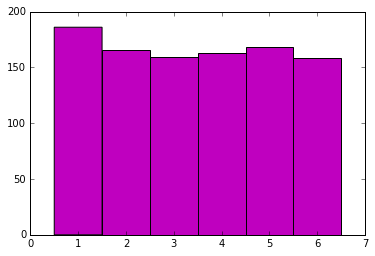

In [39]:
dado=[1,2,3,4,5,6]
d = []
for i in range(1000):
    u = random.choice(dado)
    d.append(u)
    
#s = pd.Series(d)
#s.plot.hist(bins=6)
b = np.arange(0.5,7,1)
plt.hist(d,bins=b, color="m")   


### Todas as faces tem probabilidade semelhante, porém o historgrama mostra que não pode ser igual a realidade, visto que são poucas iterações. Além disso, não podemos dizer DE VERDADE que a função random do phyton é aleatória de verdade, visto que existem algorítmos por trás do computador que a calculam.

___
## <font color='blue'>Exercício 2</font>

Ampliando o espaço amostral para as possíveis jogadas de 2 dados, analise as seguintes situações:
    
    a) Jogando os dois dados ao mesmo tempo. Qual é a probabilidade de obter soma 7?
    
    b) Jogando um dado e depois o segundo dado. Qual é a probabilidade de obter soma 7 já sabendo o resultado do primeiro? Compare o resultado com item anterior! Por que é igual ou diferente?

In [47]:
#2+5, 3+4, 1+6
t = 0
l = 0
n0 = 10000
for i in range(n0):
    d1 = random.choice(dado)
    d2 = random.choice(dado)
    if d1 + d2 == 7:
        t += 1
    else:
        l += 1
print((t/n0)*100)
print((l/n0)*100)

16.33
83.67


In [52]:
t2 = 0
l2 = 0
for i in range(n0):
    d12 = random.choice(dado)
    d22 = random.choice(dado)
    if (7 - d12 == d22):
        t2 += 1
    else:
        l2 += 1
print((t2/n0)*100)
print((l2/n0)*100)

"""O resultado é igual, pois saber o primeiro resultado não muda de fato a chance de dar a soma"""

16.45
83.55


'O resultado é igual, pois saber o primeiro resultado não muda de fato a chance de dar a soma'

___
## <font color='blue'>Exercício 3</font>

Simule 10000 vezes o problema de Monty Hall¹ , usar o seguinte algoritmo:


* Repetir 10000 vezes:
    * Sorteie um número de porta de 1 a 3 para ser a premiada
    * Sorteie um número de porta de 1 a 3 para ser a porta escolhida.
    * Sorteie um número de porta para ser a aberta, desde que não seja a premiada e nem a porta escolhida. Assim, se:
        * porta premiada é 1 e a escolhida é 1, sorteie entre as portas 2 e 3 para ser aberta
        * porta premiada é 1 e a escolhida é 2, com probabilidade 1 deve abrir a porta 3
        * porta premiada é 1 e a escolhida é 3, com probabilidade 1 deve abrir a porta 2
        * assim para demais casos...
    
    * Calcule quantas vezes indivíduo ganha ao trocar de porta. Ou seja, se:
        * porta premiada é 1, a escolhida é 1 e aberta é 2 (ou 3), indivíduo perde se trocar de porta
        * porta premiada é 1, a escolhida é 2 e aberta é 3, indivíduo ganha se trocar de porta
        * porta premiada é 1, a escolhida é 3 e aberta é 2, indivíduo ganha se trocar de porta
        * assim para demais casos...
        
    * Exibir quantas vezes em 10000, o indivíduo ganhou ao trocar de porta.

Compare o resultado numérico com o resultado analítico obtido via Teorema de Bayes.

¹https://en.wikipedia.org/wiki/Monty_Hall_problem e 
Exercício 1.4.5 de http://www.portalaction.com.br/probabilidades/14-eventos-independentes-e-probabilidade-condicional

In [3]:
import random

play = 100000
door = ["Bode", "Bode", "Carro"]
loss = 0
win = 0

for i in range(play):

    a = random.randrange(0,3)
    choose = door[a]
    #vc escolhe o numero a. Se vc trocar, em a=0 vc ganha, em a=1 vc tb ganha e em a=2 vc perde :(
    #ps: isso somente se o cara te mostrar a porta do bode!
    if a == 0 or a == 1:
        win += 1
    else:
        loss += 1

porcentagem = (win/play) * 100
print("Carros ganhos: {0}".format(win))
print("Bodes ganhos: {0}" .format(loss))
print("Você ganhou um carro {0}% das vezes".format(porcentagem))

Carros ganhos: 66573
Bodes ganhos: 33427
Você ganhou um carro 66.57300000000001% das vezes


### O resultado do problema da aproximadamente 66% de vitória, que é um número próximo a 2/3. Como dito no primeiro exercício, o único problema é saber quão aleatório de verdade é a função do python, pois há um algorítmo funcionando por trás.